In [4]:
import os

folder_path = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file"

for filename in os.listdir(folder_path):
    if filename.lower().endswith(".rec"):
        base = os.path.splitext(filename)[0]
        new_name = base + ".edf"
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_name))
        print(f"Renamed: {filename} -> {new_name}")


Renamed: ucddb002.rec -> ucddb002.edf
Renamed: ucddb003.rec -> ucddb003.edf
Renamed: ucddb005.rec -> ucddb005.edf
Renamed: ucddb006.rec -> ucddb006.edf
Renamed: ucddb007.rec -> ucddb007.edf
Renamed: ucddb008.rec -> ucddb008.edf
Renamed: ucddb009.rec -> ucddb009.edf
Renamed: ucddb010.rec -> ucddb010.edf
Renamed: ucddb011.rec -> ucddb011.edf
Renamed: ucddb012.rec -> ucddb012.edf
Renamed: ucddb013.rec -> ucddb013.edf
Renamed: ucddb014.rec -> ucddb014.edf
Renamed: ucddb015.rec -> ucddb015.edf
Renamed: ucddb017.rec -> ucddb017.edf
Renamed: ucddb018.rec -> ucddb018.edf
Renamed: ucddb019.rec -> ucddb019.edf
Renamed: ucddb020.rec -> ucddb020.edf
Renamed: ucddb021.rec -> ucddb021.edf
Renamed: ucddb022.rec -> ucddb022.edf
Renamed: ucddb023.rec -> ucddb023.edf
Renamed: ucddb024.rec -> ucddb024.edf
Renamed: ucddb025.rec -> ucddb025.edf
Renamed: ucddb026.rec -> ucddb026.edf
Renamed: ucddb027.rec -> ucddb027.edf
Renamed: ucddb028.rec -> ucddb028.edf


In [46]:
import os
import pandas as pd

# Folder containing your CSV files
folder_path = r"C:\\Users\Admin\\Desktop\\lab\\sleep_apnea\\raw_ecg\\Rec_file"
# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        print(f"\nReading: {filename}")
        try:
            df = pd.read_csv(file_path)
            print(df.head())
        except Exception as e:
            print(f"Error reading {filename}: {e}")



Reading: ucddb002_ecg.csv
   Time (s)  ECG (mV)
0  0.000000  0.423932
1  0.007812  0.429792
2  0.015625  0.412210
3  0.023438  0.459096
4  0.031250  0.513797

Reading: ucddb003_ecg.csv
   Time (s)  ECG (mV)
0  0.000000  0.410256
1  0.007812  0.408303
2  0.015625  0.410256
3  0.023438  0.408303
4  0.031250  0.402442

Reading: ucddb005_ecg.csv
   Time (s)  ECG (mV)
0  0.000000  0.505983
1  0.007812  0.498168
2  0.015625  0.498168
3  0.023438  0.505983
4  0.031250  0.513797

Reading: ucddb006_ecg.csv
   Time (s)  ECG (mV)
0  0.000000  0.965079
1  0.007812  0.922100
2  0.015625  0.875214
3  0.023438  0.806838
4  0.031250  0.763858

Reading: ucddb007_ecg.csv
   Time (s)  ECG (mV)
0  0.000000  0.441514
1  0.007812  0.447375
2  0.015625  0.466911
3  0.023438  0.470818
4  0.031250  0.455189

Reading: ucddb008_ecg.csv
   Time (s)  ECG (mV)
0  0.000000  0.271551
1  0.007812  0.224664
2  0.015625  0.181685
3  0.023438  0.191453
4  0.031250  0.205128

Reading: ucddb009_ecg.csv
   Time (s)  ECG (m

KeyboardInterrupt: 

In [48]:
import os
import mne
import pandas as pd

# Set your folder path here
folder_path = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file"
folder_path1 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\edf_to_csv"
# Loop over all files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith((".edf", ".rec")):
        file_path = os.path.join(folder_path, filename)
        print(f"Processing: {filename}")

        try:
            # Load the EDF/REC file
            raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)

            # Try to pick ECG channel (edit if necessary)
            ecg_channels = [ch for ch in raw.ch_names if 'ecg' in ch.lower()]
            if not ecg_channels:
                print(f"No ECG channel found in {filename}")
                continue

            # Get ECG data and times
            ecg_data, times = raw.copy().pick_channels(ecg_channels).get_data(return_times=True)

            # Detect precision from first ECG value
            sample_ecg_value = ecg_data[0][0]
            ecg_precision = len(str(sample_ecg_value).split(".")[1]) if "." in str(sample_ecg_value) else 0
            float_format_str = f'%.{ecg_precision}f'

            # Create DataFrame
            df = pd.DataFrame({
                'Time (s)': times,
                'ECG (mV)': ecg_data[0]
            })

            # Save to CSV
            output_name = os.path.splitext(filename)[0] + "_ecg.csv"
            output_path = os.path.join(folder_path1, output_name)
            df.to_csv(output_path, index=False, float_format=float_format_str)
            print(f"✅ Saved: {output_name} with time precision: {ecg_precision} decimals")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")


Processing: ucddb002.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb002_ecg.csv with time precision: 16 decimals
Processing: ucddb003.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb003_ecg.csv with time precision: 17 decimals
Processing: ucddb005.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb005_ecg.csv with time precision: 15 decimals
Processing: ucddb006.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb006_ecg.csv with time precision: 16 decimals
Processing: ucddb007.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb007_ecg.csv with time precision: 16 decimals
Processing: ucddb008.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb008_ecg.csv with time precision: 16 decimals
Processing: ucddb009.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb009_ecg.csv with time precision: 15 decimals
Processing: ucddb010.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb010_ecg.csv with time precision: 17 decimals
Processing: ucddb011.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb011_ecg.csv with time precision: 17 decimals
Processing: ucddb012.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb012_ecg.csv with time precision: 16 decimals
Processing: ucddb013.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb013_ecg.csv with time precision: 16 decimals
Processing: ucddb014.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb014_ecg.csv with time precision: 14 decimals
Processing: ucddb015.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb015_ecg.csv with time precision: 16 decimals
Processing: ucddb017.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb017_ecg.csv with time precision: 16 decimals
Processing: ucddb018.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb018_ecg.csv with time precision: 17 decimals
Processing: ucddb019.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb019_ecg.csv with time precision: 17 decimals
Processing: ucddb020.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb020_ecg.csv with time precision: 16 decimals
Processing: ucddb021.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb021_ecg.csv with time precision: 16 decimals
Processing: ucddb022.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb022_ecg.csv with time precision: 16 decimals
Processing: ucddb023.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb023_ecg.csv with time precision: 16 decimals
Processing: ucddb024.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb024_ecg.csv with time precision: 16 decimals
Processing: ucddb025.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb025_ecg.csv with time precision: 17 decimals
Processing: ucddb026.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb026_ecg.csv with time precision: 17 decimals
Processing: ucddb027.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb027_ecg.csv with time precision: 16 decimals
Processing: ucddb028.edf


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\2941045457.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
✅ Saved: ucddb028_ecg.csv with time precision: 17 decimals



Plotting: ucddb002_ecg.csv


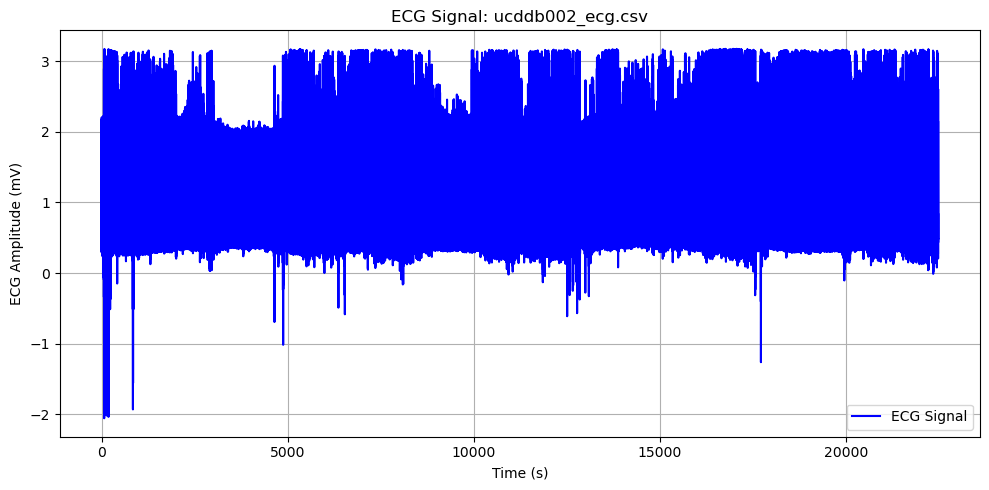


Plotting: ucddb003_ecg.csv


KeyboardInterrupt: 

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing your CSV files
folder_path1 = r"C:\\Users\Admin\\Desktop\\lab\\sleep_apnea\\raw_ecg\\Rec_file\\edf_to_csv"

# Column names in your CSV
time_column = 'Time (s)'
ecg_column = 'ECG (mV)'  # Make sure this matches your CSV exactly

# Loop through each CSV file
for filename in os.listdir(folder_path1):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path1, filename)
        print(f"\nPlotting: {filename}")
        try:
            df = pd.read_csv(file_path)

            # Plot ECG signal
            plt.figure(figsize=(10, 5))
            plt.plot(df[time_column], df[ecg_column], label="ECG Signal", color="blue")
            plt.xlabel("Time (s)")
            plt.ylabel("ECG Amplitude (mV)")
            plt.title(f"ECG Signal: {filename}")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error processing {filename}: {e}")




Processing: ucddb002_ecg.csv


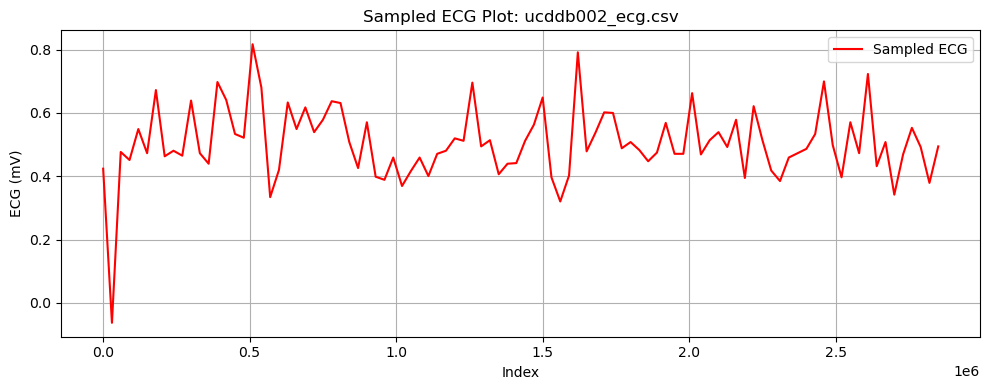


Processing: ucddb003_ecg.csv


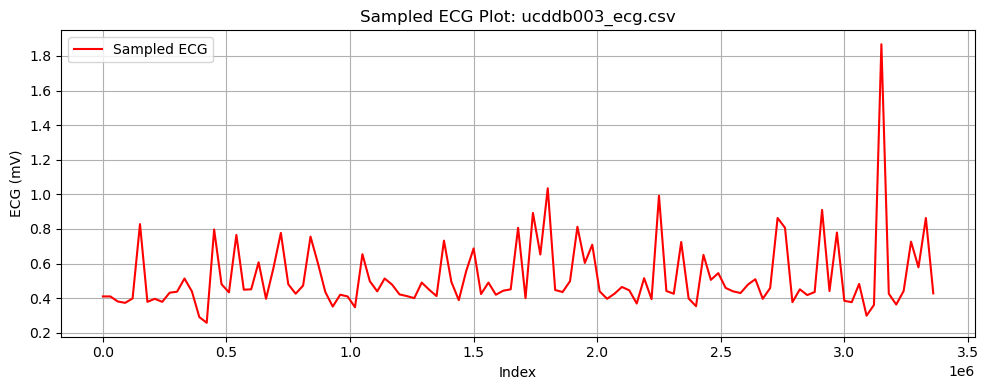


Processing: ucddb005_ecg.csv


KeyboardInterrupt: 

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt


folder_path1 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\edf_to_csv"
ecg_column = 'ECG (mV)' 

# Loop through each CSV file in the folder
for filename in os.listdir(folder_path1):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path1, filename)
        print(f"\nProcessing: {filename}")

        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Sample every 30,000 rows
            df_sampled = df.iloc[::30000]

            # Plot sampled ECG
            plt.figure(figsize=(10, 4))
            plt.plot(df_sampled.index, df_sampled[ecg_column], color="red", label="Sampled ECG")
            plt.xlabel("Index")
            plt.ylabel("ECG (mV)")
            plt.title(f"Sampled ECG Plot: {filename}")
            plt.grid()
            plt.legend()
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Error in {filename}: {e}")



Plotting zoomed-in ECG: ucddb002_ecg.csv


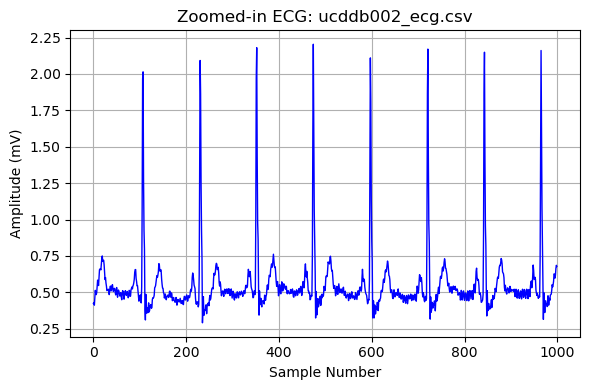


Plotting zoomed-in ECG: ucddb003_ecg.csv


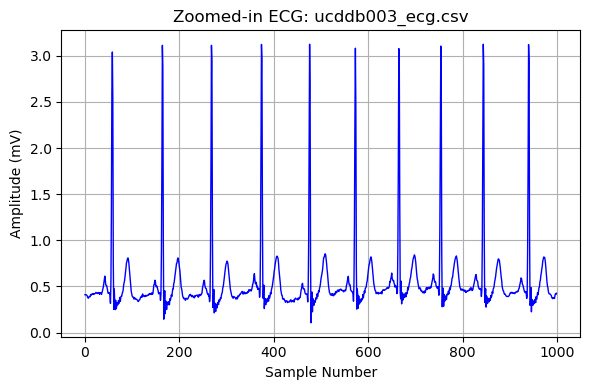


Plotting zoomed-in ECG: ucddb005_ecg.csv


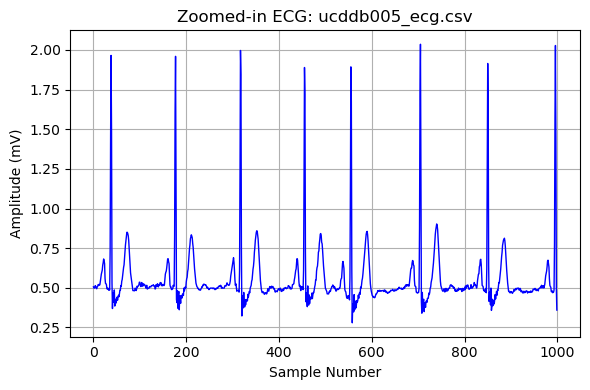


Plotting zoomed-in ECG: ucddb006_ecg.csv


KeyboardInterrupt: 

In [56]:

# Loop through each CSV file
for filename in os.listdir(folder_path1):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        print(f"\nPlotting zoomed-in ECG: {filename}")

        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Plot only the first 1000 samples
            plt.figure(figsize=(6, 4))
            plt.plot(df.index[:1000], df[ecg_column][:1000], color="blue", linewidth=1)
            plt.xlabel("Sample Number")
            plt.ylabel("Amplitude (mV)")
            plt.title(f"Zoomed-in ECG: {filename}")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Error in {filename}: {e}")



Processing: ucddb002_ecg.csv


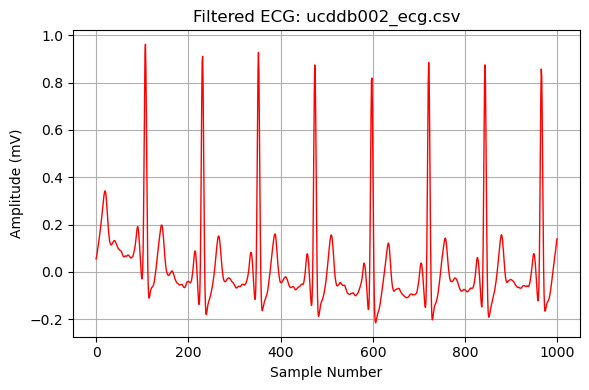


Processing: ucddb003_ecg.csv


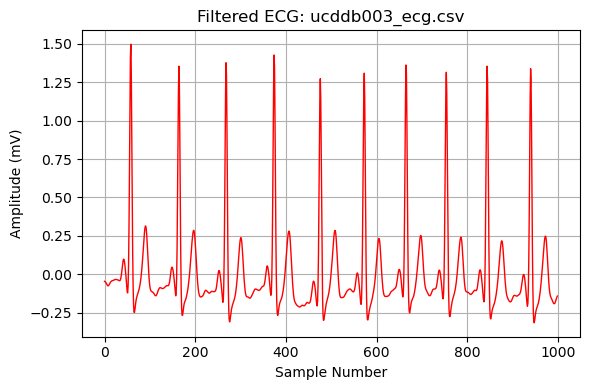


Processing: ucddb005_ecg.csv


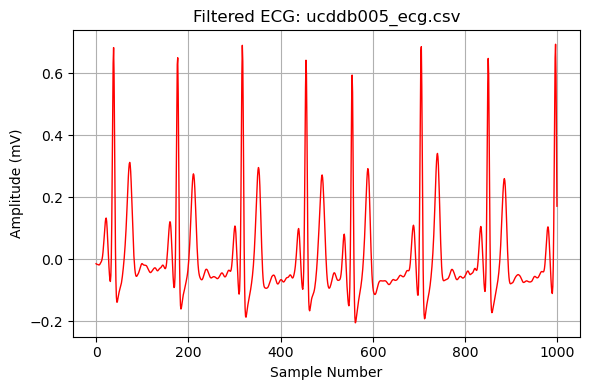


Processing: ucddb006_ecg.csv


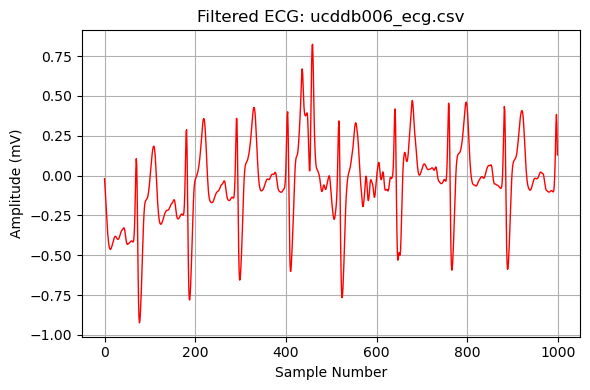


Processing: ucddb007_ecg.csv


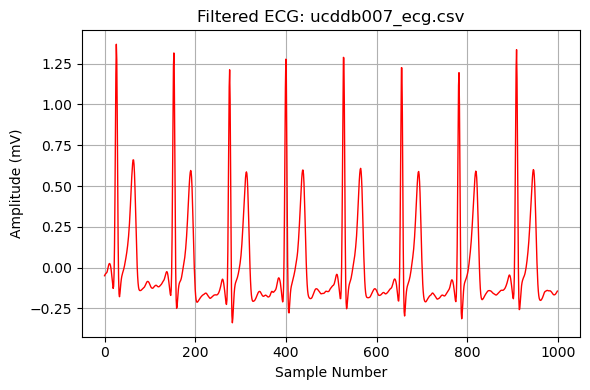


Processing: ucddb008_ecg.csv


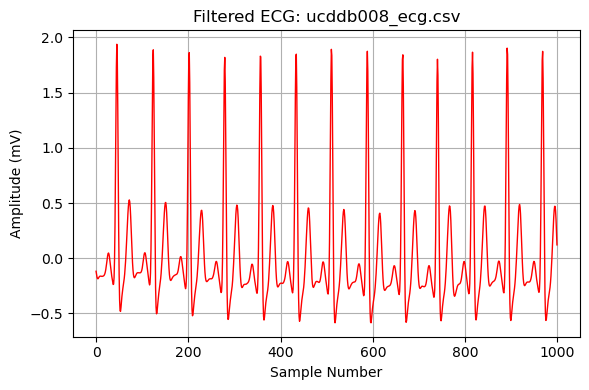


Processing: ucddb009_ecg.csv


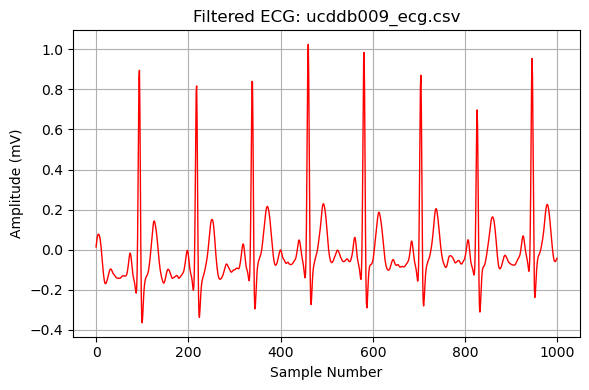


Processing: ucddb010_ecg.csv


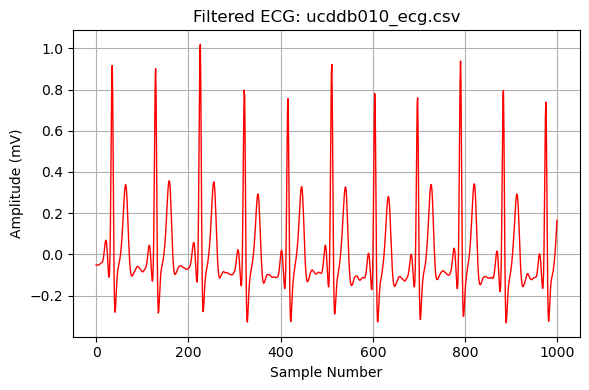


Processing: ucddb011_ecg.csv


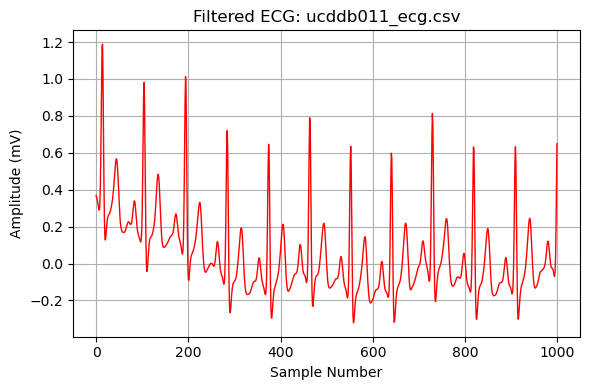


Processing: ucddb012_ecg.csv


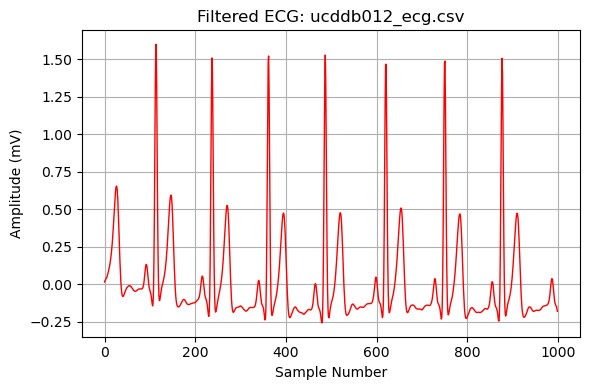


Processing: ucddb013_ecg.csv


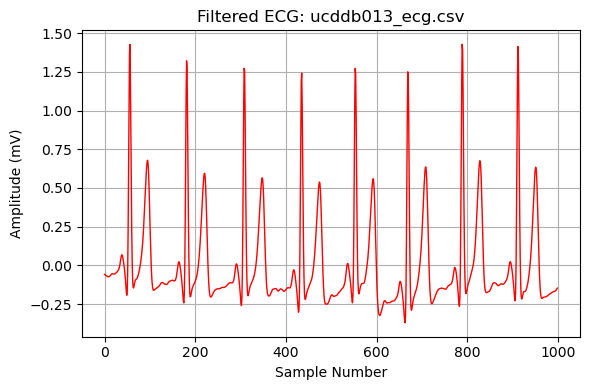


Processing: ucddb014_ecg.csv


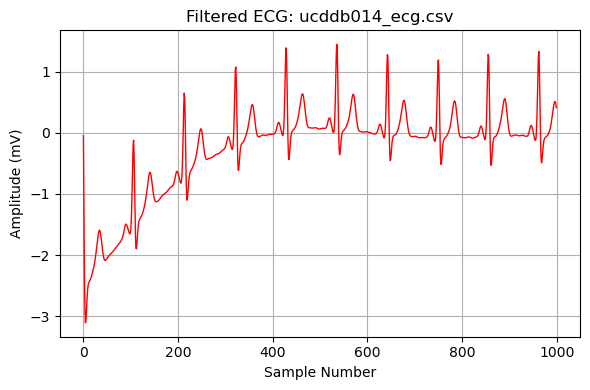


Processing: ucddb015_ecg.csv


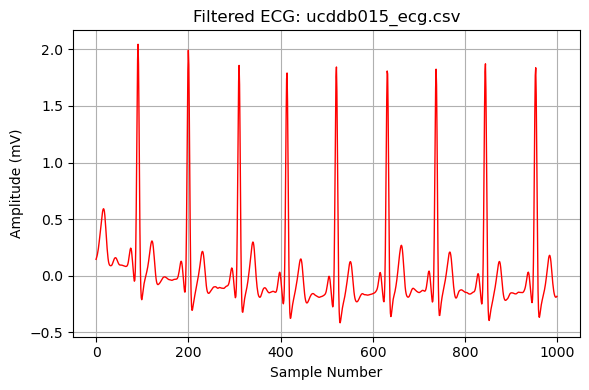


Processing: ucddb017_ecg.csv


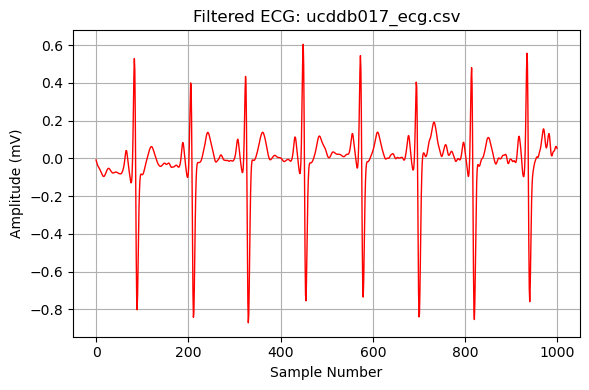


Processing: ucddb018_ecg.csv


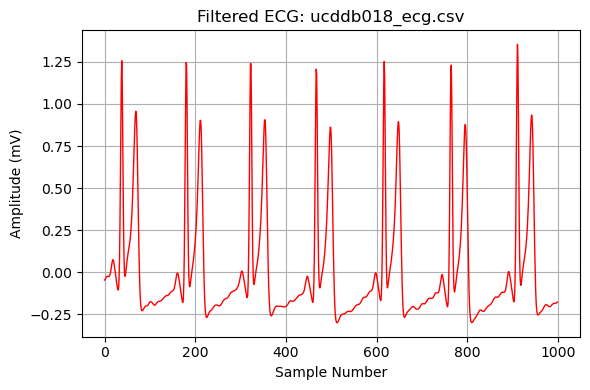


Processing: ucddb019_ecg.csv


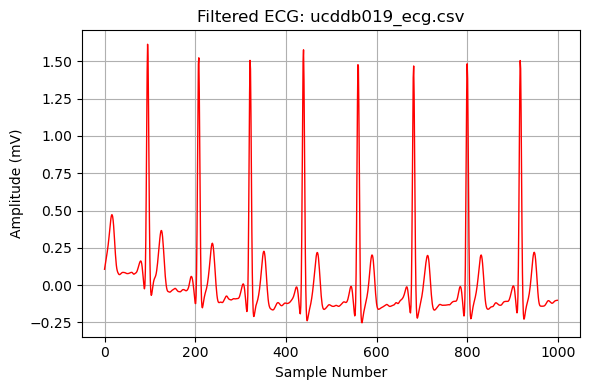


Processing: ucddb020_ecg.csv


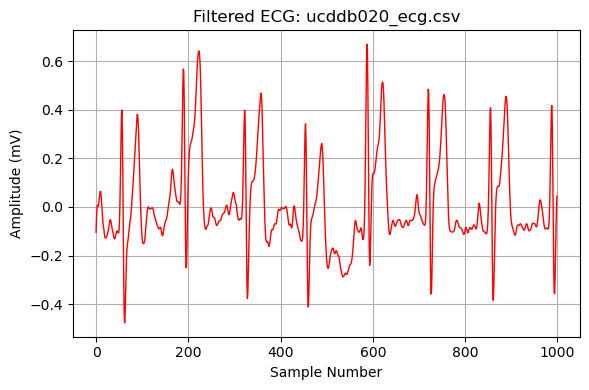


Processing: ucddb021_ecg.csv


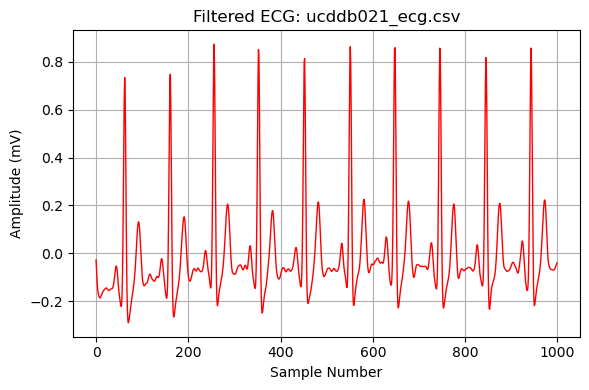


Processing: ucddb022_ecg.csv


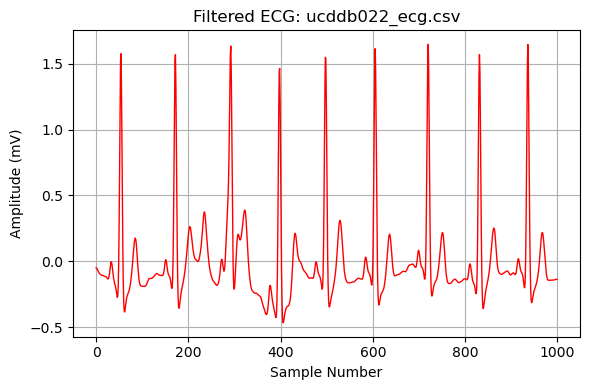


Processing: ucddb023_ecg.csv


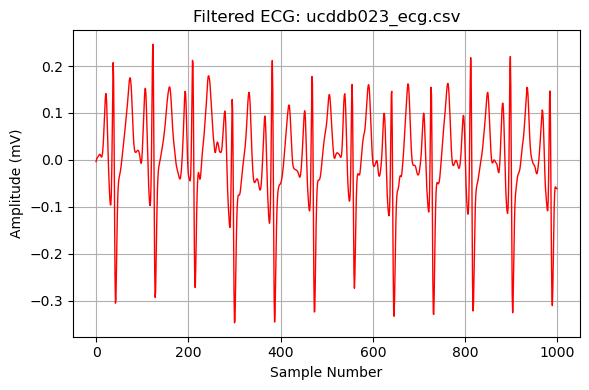


Processing: ucddb024_ecg.csv


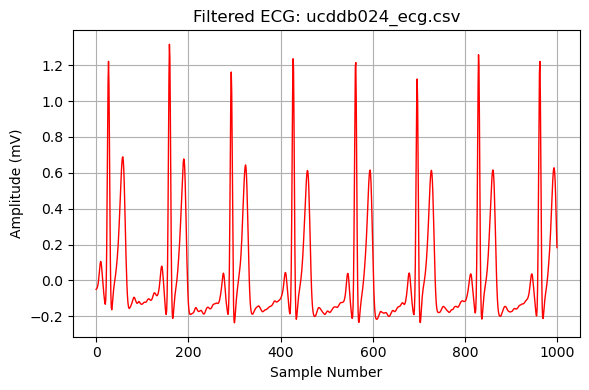


Processing: ucddb025_ecg.csv


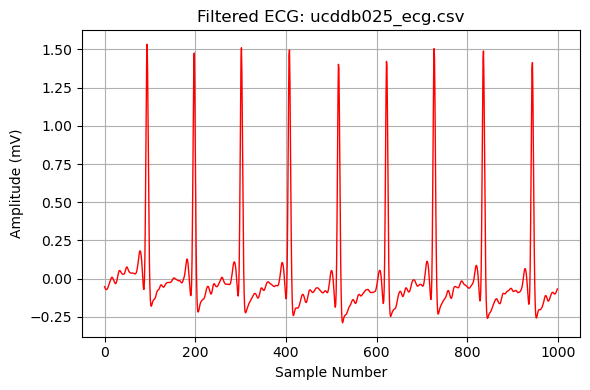


Processing: ucddb026_ecg.csv


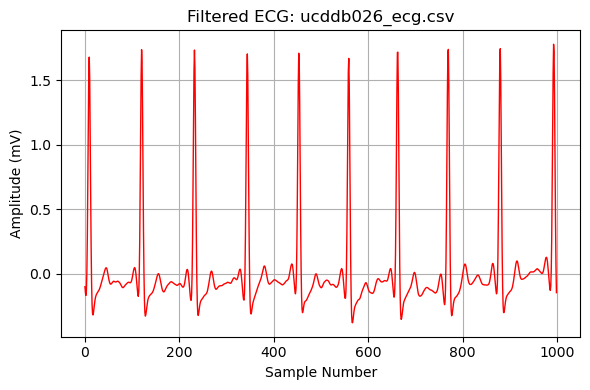


Processing: ucddb027_ecg.csv


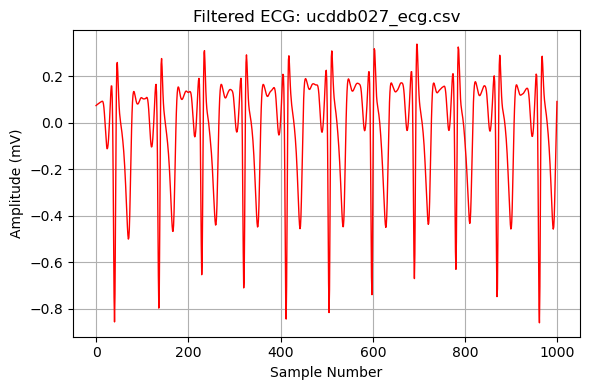


Processing: ucddb028_ecg.csv


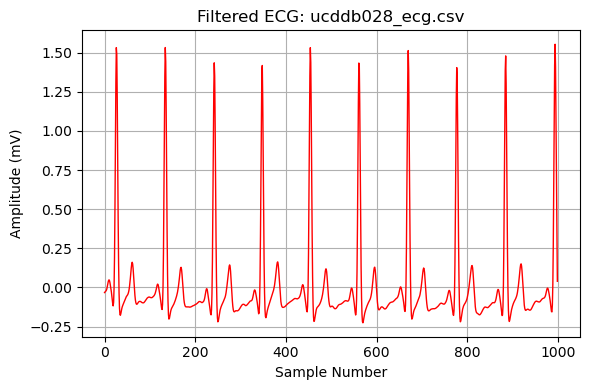

In [57]:

from scipy.signal import butter, filtfilt
# Bandpass filter function (0.5–50 Hz)
def bandpass_filter(signal, lowcut=0.5, highcut=50, fs=500, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal)

# Loop through each CSV file
for filename in os.listdir(folder_path1):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path1, filename)
        print(f"\nProcessing: {filename}")

        try:
            # Load CSV
            df = pd.read_csv(file_path)

            # Apply bandpass filter to ECG signal
            df["filtered_ecg"] = bandpass_filter(df[ecg_column], fs=500)

            # Plot first 1000 filtered samples
            plt.figure(figsize=(6, 4))
            plt.plot(df.index[:1000], df["filtered_ecg"][:1000], color="red", linewidth=1)
            plt.xlabel("Sample Number")
            plt.ylabel("Amplitude (mV)")
            plt.title(f"Filtered ECG: {filename}")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Error in {filename}: {e}")


In [58]:
print(df.columns)



Index(['Time (s)', 'ECG (mV)', 'filtered_ecg'], dtype='object')


Processing: ucddb002_ecg.csv


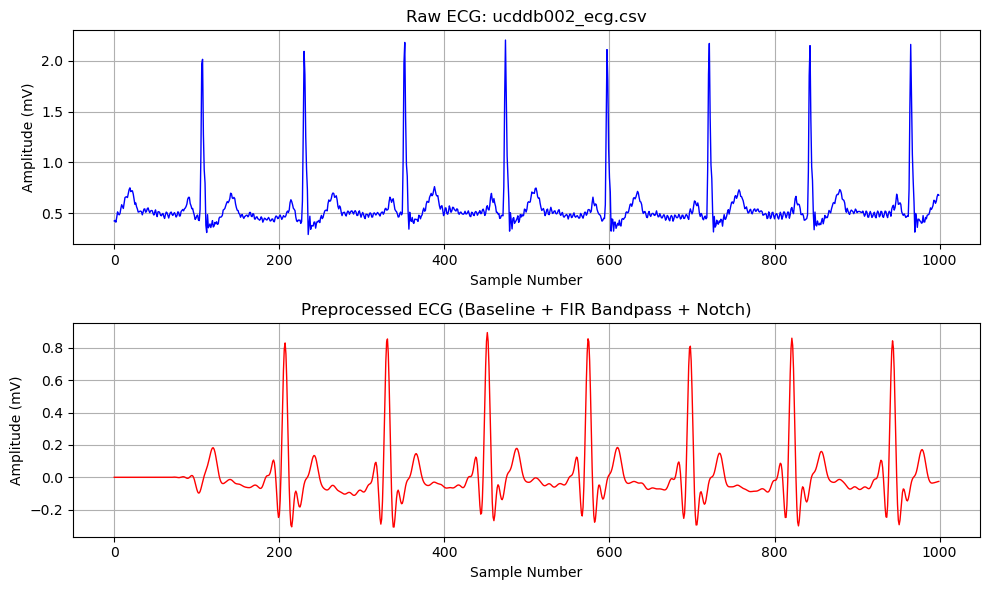

Processing: ucddb003_ecg.csv


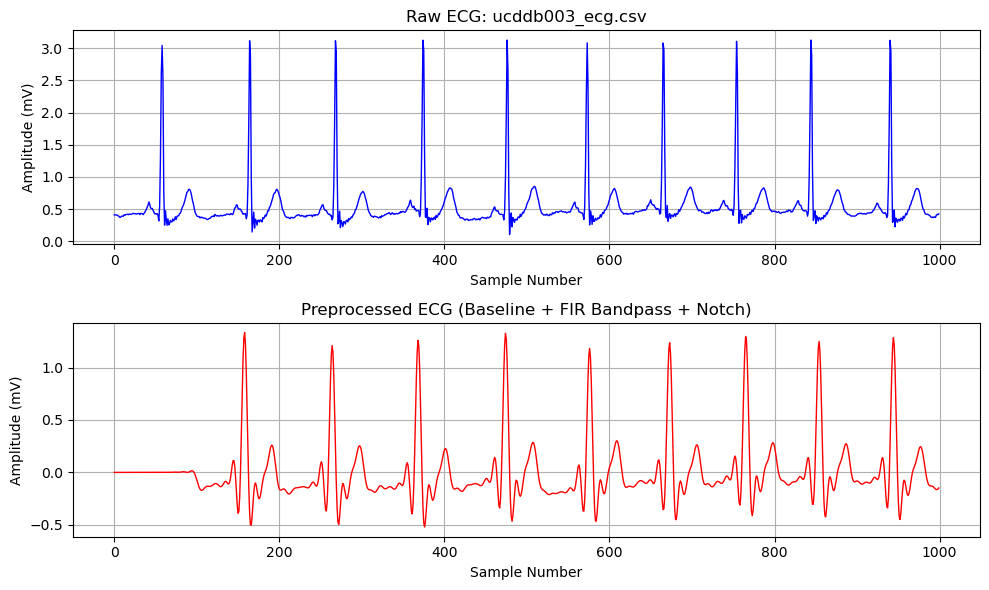

Processing: ucddb005_ecg.csv


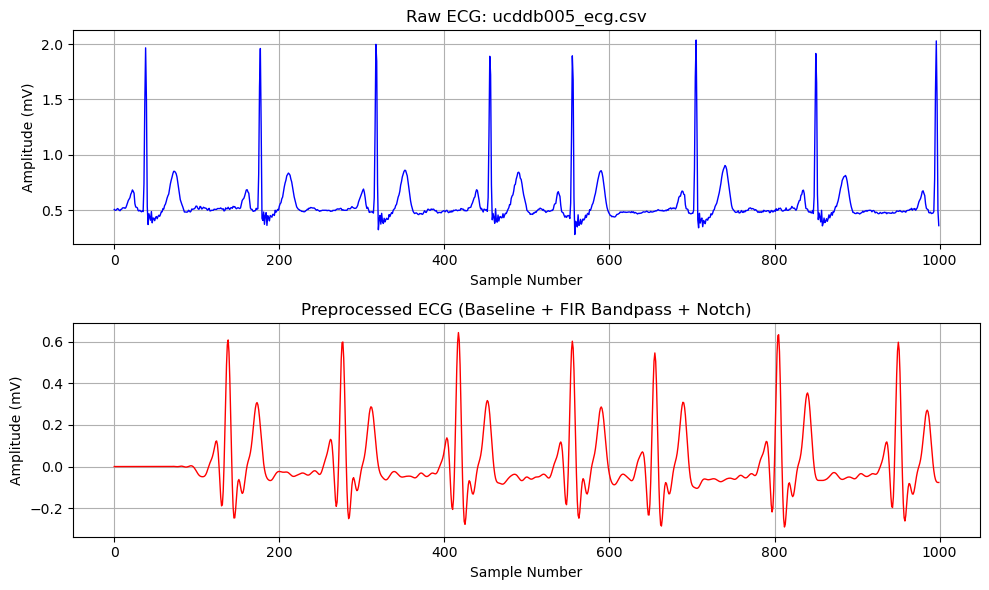

Processing: ucddb006_ecg.csv


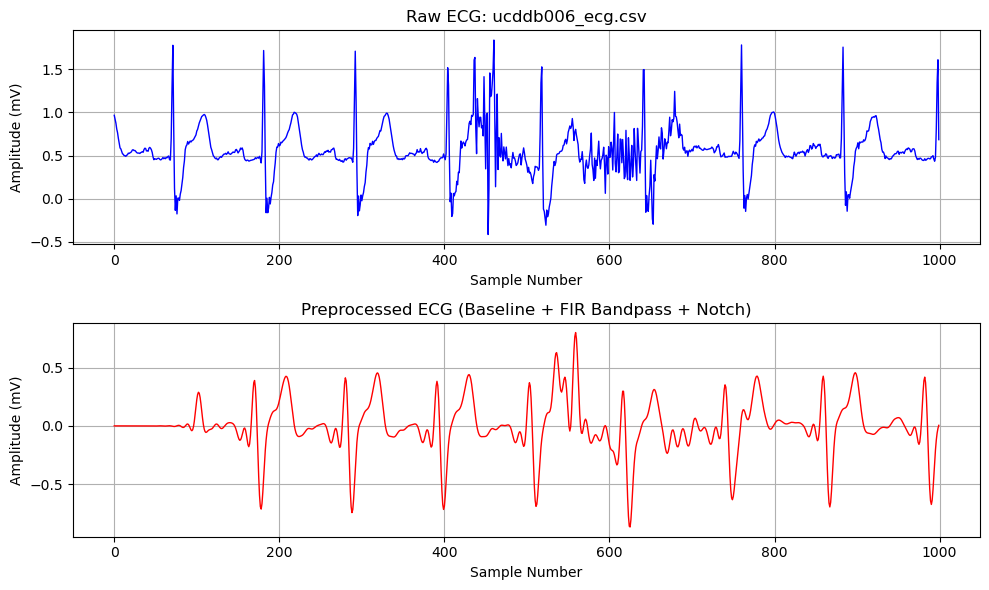

Processing: ucddb007_ecg.csv


KeyboardInterrupt: 

In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, detrend

# === ECG Preprocessing Functions ===

# 1. Baseline correction
def baseline_correction(signal, method="detrend", window_size=100):
    if method == "detrend":
        return detrend(signal)
    elif method == "moving_average":
        baseline = np.convolve(signal, np.ones(window_size)/window_size, mode="same")
        return signal - baseline
    else:
        raise ValueError("Invalid method. Choose 'detrend' or 'moving_average'.")

# 2. FIR Bandpass filter (0.5 - 50 Hz)
def fir_bandpass_filter(signal, lowcut=0.5, highcut=50, fs=500, numtaps=101):
    taps = firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=fs)
    return lfilter(taps, 1.0, signal)

# 3. FIR Notch filter (50 Hz)
def fir_notch_filter(signal, notch_freq=50, fs=500, numtaps=101):
    notch_band = [notch_freq - 2, notch_freq + 2]  # 48–52 Hz
    taps = firwin(numtaps, notch_band, pass_zero=True, fs=fs)
    return lfilter(taps, 1.0, signal)

# === Parameters ===
folder_path1 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\edf_to_csv"
ecg_column = "ECG (mV)"
fs = 500  # Sampling frequency in Hz

# === Process Each CSV File ===
for filename in os.listdir(folder_path1):
    if filename.endswith("_ecg.csv"):
        file_path = os.path.join(folder_path1, filename)
        print(f"Processing: {filename}")

        try:
            # Load ECG data
            df = pd.read_csv(file_path)

            # Skip if column is missing
            if ecg_column not in df.columns:
                print(f"Column '{ecg_column}' not found in {filename}")
                continue

            # === Preprocessing steps ===
            df["baseline_corrected_ecg"] = baseline_correction(df[ecg_column])
            df["bandpass_filtered_ecg"] = fir_bandpass_filter(df["baseline_corrected_ecg"], fs=fs)
            df["preprocessed_ecg"] = fir_notch_filter(df["bandpass_filtered_ecg"], fs=fs)

            # === Plot raw vs preprocessed ===
            plt.figure(figsize=(10, 6))
            
            # Raw ECG
            plt.subplot(2, 1, 1)
            plt.plot(df.index[:1000], df[ecg_column][:1000], color="blue", linewidth=1)
            plt.xlabel("Sample Number")
            plt.ylabel("Amplitude (mV)")
            plt.title(f"Raw ECG: {filename}")
            plt.grid(True)
            
            # Preprocessed ECG
            plt.subplot(2, 1, 2)
            plt.plot(df.index[:1000], df["preprocessed_ecg"][:1000], color="red", linewidth=1)
            plt.xlabel("Sample Number")
            plt.ylabel("Amplitude (mV)")
            plt.title("Preprocessed ECG (Baseline + FIR Bandpass + Notch)")
            plt.grid(True)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")


In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, detrend

# === ECG Preprocessing Functions ===

def baseline_correction(signal, method="detrend", window_size=100):
    if method == "detrend":
        return detrend(signal)
    elif method == "moving_average":
        baseline = np.convolve(signal, np.ones(window_size)/window_size, mode="same")
        return signal - baseline
    else:
        raise ValueError("Invalid method. Choose 'detrend' or 'moving_average'.")

def fir_bandpass_filter(signal, lowcut=0.5, highcut=50, fs=500, numtaps=101):
    taps = firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=fs)
    return lfilter(taps, 1.0, signal)

def fir_notch_filter(signal, notch_freq=50, fs=500, numtaps=101):
    notch_band = [notch_freq - 2, notch_freq + 2]
    taps = firwin(numtaps, notch_band, pass_zero=True, fs=fs)
    return lfilter(taps, 1.0, signal)

# === Folder and Parameters ===
folder_path2 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\preprocessed_edf"
ecg_column = "ECG (mV)"
fs = 500  # Hz

# === Process All Files ===
for filename in os.listdir(folder_path1):
    if filename.endswith("_ecg.csv"):
        file_path = os.path.join(folder_path1, filename)
        print(f"\nProcessing: {filename}")

        try:
            df = pd.read_csv(file_path)
            if ecg_column not in df.columns:
                print(f"Missing '{ecg_column}' column in {filename}")
                continue

            # Preprocessing
            df["baseline_corrected_ecg"] = baseline_correction(df[ecg_column])
            df["bandpass_filtered_ecg"] = fir_bandpass_filter(df["baseline_corrected_ecg"], fs=fs)
            df["preprocessed_ecg"] = fir_notch_filter(df["bandpass_filtered_ecg"], fs=fs)

            # Save preprocessed DataFrame
            preprocessed_df = pd.DataFrame({
                "Time (s)": df["Time (s)"],
                "Baseline_Corrected_ECG": df["baseline_corrected_ecg"],
                "Bandpass_Filtered_ECG": df["bandpass_filtered_ecg"],
                "Preprocessed_ECG": df["preprocessed_ecg"]
            })

            output_name = filename.replace("_ecg.csv", "_preprocessed.csv")
            output_path = os.path.join(folder_path2, output_name)
            preprocessed_df.to_csv(output_path, index=False)
            print(f"✅ Saved preprocessed file: {output_name}")
            print(preprocessed_df.head())  # Show preview

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")



Processing: ucddb002_ecg.csv
✅ Saved preprocessed file: ucddb002_preprocessed.csv
   Time (s)  Baseline_Corrected_ECG  Bandpass_Filtered_ECG  Preprocessed_ECG
0  0.000000               -0.123810               0.000019     -1.885654e-08
1  0.007812               -0.117949               0.000076     -8.967117e-08
2  0.015625               -0.135531               0.000162     -2.245569e-07
3  0.023438               -0.088645               0.000250     -3.905757e-07
4  0.031250               -0.033944               0.000298     -4.970318e-07

Processing: ucddb003_ecg.csv
✅ Saved preprocessed file: ucddb003_preprocessed.csv
   Time (s)  Baseline_Corrected_ECG  Bandpass_Filtered_ECG  Preprocessed_ECG
0  0.000000               -0.140740               0.000022     -2.143508e-08
1  0.007812               -0.142694               0.000088     -1.032454e-07
2  0.015625               -0.140740               0.000186     -2.582246e-07
3  0.023438               -0.142694               0.000291     -

In [61]:
import os
import numpy as np
import pandas as pd
from scipy.signal import firwin, lfilter, detrend

# === Preprocessing Functions ===

def baseline_correction(signal, method="detrend", window_size=100):
    if method == "detrend":
        return detrend(signal)
    elif method == "moving_average":
        baseline = np.convolve(signal, np.ones(window_size)/window_size, mode="same")
        return signal - baseline
    else:
        raise ValueError("Invalid method.")

def fir_bandpass_filter(signal, lowcut=0.5, highcut=50, fs=500, numtaps=101):
    taps = firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=fs)
    return lfilter(taps, 1.0, signal)

def fir_notch_filter(signal, notch_freq=50, fs=500, numtaps=101):
    notch_band = [notch_freq - 2, notch_freq + 2]
    taps = firwin(numtaps, notch_band, pass_zero=True, fs=fs)
    return lfilter(taps, 1.0, signal)

# === Folder and Parameters ===
folder_path1 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\edf_to_csv"
folder_path3 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\preprocessed_edf_final"
ecg_column = "ECG (mV)"
fs = 500

# === Batch Processing ===
for filename in os.listdir(folder_path1):
    if filename.endswith("_ecg.csv"):
        file_path = os.path.join(folder_path1, filename)
        print(f"\nProcessing: {filename}")

        try:
            df = pd.read_csv(file_path)
            if ecg_column not in df.columns:
                print(f"Missing '{ecg_column}' in {filename}")
                continue

            # Preprocessing
            baseline = baseline_correction(df[ecg_column])
            bandpassed = fir_bandpass_filter(baseline, fs=fs)
            preprocessed = fir_notch_filter(bandpassed, fs=fs)

            # Keep only Time and Final Preprocessed ECG
            preprocessed_df = pd.DataFrame({
                "Time (s)": df["Time (s)"],
                "Preprocessed_ECG": preprocessed
            })

            # Save output
            output_name = filename.replace("_ecg.csv", "_final.csv")
            output_path = os.path.join(folder_path3, output_name)
            preprocessed_df.to_csv(output_path, index=False)
            print(f"✅ Saved: {output_name}")
            print(preprocessed_df.head())

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")



Processing: ucddb002_ecg.csv
✅ Saved: ucddb002_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -1.885654e-08
1  0.007812     -8.967117e-08
2  0.015625     -2.245569e-07
3  0.023438     -3.905757e-07
4  0.031250     -4.970318e-07

Processing: ucddb003_ecg.csv
✅ Saved: ucddb003_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -2.143508e-08
1  0.007812     -1.032454e-07
2  0.015625     -2.582246e-07
3  0.023438     -4.520897e-07
4  0.031250     -6.032244e-07

Processing: ucddb005_ecg.csv
✅ Saved: ucddb005_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -6.348965e-09
1  0.007812     -3.168282e-08
2  0.015625     -8.186577e-08
3  0.023438     -1.462695e-07
4  0.031250     -1.952529e-07

Processing: ucddb006_ecg.csv
✅ Saved: ucddb006_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000      6.377374e-08
1  0.007812      2.997452e-07
2  0.015625      7.263254e-07
3  0.023438      1.214587e-06
4  0.031250      1.500331e-06

Processing: ucddb007_ecg.csv
✅ Saved: ucddb007_

In [76]:
import os
import pandas as pd
from datetime import datetime
import re

# === Set folder paths ===
folder_path4 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\annotation_files"
folder_path5 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\annotation_files\respevt_to_csv"

# Ensure output directory exists
os.makedirs(folder_path5, exist_ok=True)

# === Process all *_respevt.txt files ===
for filename in os.listdir(folder_path4):
    if filename.endswith("_respevt.txt"):
        file_path = os.path.join(folder_path4, filename)
        print(f"Processing: {filename}")

        try:
            with open(file_path, "r") as file:
                lines = file.readlines()

            records = []

            for line in lines:
                # Match lines starting with a valid HH:MM:SS time
                if re.match(r"^\d{2}:\d{2}:\d{2}", line.strip()):
                    parts = line.strip().split()

                    if len(parts) >= 3:
                        time_str, type_str, duration_str = parts[:3]
                        try:
                            t = datetime.strptime(time_str, "%H:%M:%S")
                            time_in_seconds = t.hour * 3600 + t.minute * 60 + t.second
                            duration = float(duration_str)
                            records.append({
                                "Time": time_in_seconds,
                                "Type": type_str,
                                "Duration": duration
                            })
                        except ValueError:
                            continue  # skip malformed values

            if records:
                df = pd.DataFrame(records)
                output_name = filename.replace(".txt", ".csv")
                output_path = os.path.join(folder_path5, output_name)
                df.to_csv(output_path, index=False)
                print(f"Saved: {output_name}")
                print(df.head())
            else:
                print(f"⚠️ No valid lines found in {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")



Processing: ucddb002_respevt.txt
Saved: ucddb002_respevt.csv
   Time   Type  Duration
0  1753  HYP-C      16.0
1  3586  HYP-C      20.0
2  3697  HYP-C      13.0
3  3745  HYP-C      13.0
4  4067  HYP-C      14.0
Processing: ucddb003_respevt.txt
Saved: ucddb003_respevt.csv
   Time   Type  Duration
0  1982  HYP-O      13.0
1  2340  HYP-O      16.0
2  2411  HYP-O      19.0
3  2504  HYP-O      16.0
4  2542  HYP-O      14.0
Processing: ucddb005_respevt.txt
Saved: ucddb005_respevt.csv
    Time   Type  Duration
0  84759  HYP-C      16.0
1  85551  HYP-O      11.0
2  85595  HYP-O      11.0
3  85656  HYP-O      17.0
4  85955  HYP-C      15.0
Processing: ucddb006_respevt.txt
Saved: ucddb006_respevt.csv
   Time     Type  Duration
0   771    HYP-O      14.0
1   810    HYP-O      15.0
2  1044    HYP-C      11.0
3  1083  APNEA-C      18.0
4  1123  APNEA-C      16.0
Processing: ucddb007_respevt.txt
Saved: ucddb007_respevt.csv
   Time     Type  Duration
0   254  APNEA-O      21.0
1   635    HYP-O      1

In [77]:
import os
import pandas as pd

# Path to the folder containing preprocessed CSV files
folder_path3 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\preprocessed_edf_final"

# Loop through all CSV files and print their head
for filename in os.listdir(folder_path3):
    if filename.lower().endswith(".csv"):
        file_path = os.path.join(folder_path3, filename)
        print(f"\n File: {filename}")
        try:
            df = pd.read_csv(file_path)
            print(df.head())
        except Exception as e:
            print(f" Error reading {filename}: {e}")



 File: ucddb002_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -1.885654e-08
1  0.007812     -8.967117e-08
2  0.015625     -2.245569e-07
3  0.023438     -3.905757e-07
4  0.031250     -4.970318e-07

 File: ucddb003_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -2.143508e-08
1  0.007812     -1.032454e-07
2  0.015625     -2.582246e-07
3  0.023438     -4.520897e-07
4  0.031250     -6.032244e-07

 File: ucddb005_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -6.348965e-09
1  0.007812     -3.168282e-08
2  0.015625     -8.186577e-08
3  0.023438     -1.462695e-07
4  0.031250     -1.952529e-07

 File: ucddb006_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000      6.377374e-08
1  0.007812      2.997452e-07
2  0.015625      7.263254e-07
3  0.023438      1.214587e-06
4  0.031250      1.500331e-06

 File: ucddb007_final.csv
   Time (s)  Preprocessed_ECG
0  0.000000     -1.638792e-08
1  0.007812     -7.781491e-08
2  0.015625     -1.892949e-07
3  0.023438     -3.181849

KeyboardInterrupt: 

In [80]:
import pandas as pd
import os

# Define the folder containing preprocessed ECG files
folder_path3 = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\preprocessed_edf_final"
file_to_read = "ucddb002_final.csv"  # Only this file will be read

# Full path to the file
file_path = os.path.join(folder_path3, file_to_read)

# Read the ECG data
ecg_data = pd.read_csv(file_path)
ecg_data.columns = ecg_data.columns.str.strip()

# Read the annotation file (for apnea event timing)
annotation_path = r"C:\Users\Admin\Desktop\lab\sleep_apnea\annotation_files\respevt_to_csv\ucddb002_respevt.csv"
df = pd.read_csv(annotation_path)
df.columns = df.columns.str.strip()

# Ensure output directory exists
os.makedirs('Non_apnea', exist_ok=True)

# Get the first apnea event start time
first_time = int(df['Time'].iloc[0])

# Segment ECG from t=0 to t=first_time
ecg_segment = ecg_data[(ecg_data['Time (s)'] >= 0) & (ecg_data['Time (s)'] < first_time)]

# Save the segment
segment_filename = f'Non_apnea/Non_Apnea_0_to_{first_time}s.csv'
ecg_segment.to_csv(segment_filename, index=False)

# Output confirmation
print("✅ Segment saved as:", segment_filename)
print(" Final value of t (first apnea event):", first_time)



✅ Segment saved as: Non_apnea/Non_Apnea_0_to_1753s.csv
 Final value of t (first apnea event): 1753


In [9]:
import os
import pandas as pd

# Folder paths
ecg_folder = r"C:\Users\Admin\Desktop\lab\sleep_apnea\raw_ecg\Rec_file\preprocessed_edf_final"
event_folder = r"C:\Users\Admin\Desktop\lab\sleep_apnea\annotation_files\respevt_to_csv"
output_root = r"C:\Users\Admin\Desktop\lab\sleep_apnea\output_segments"

# Fixed 6 event types
event_types = ['APNEA_C', 'APNEA_M', 'APNEA_O', 'HYP_C', 'HYP_M', 'HYP_O']

# Normalization function
def normalize_event_type(event_type):
    if not isinstance(event_type, str):
        return None
    event_type = event_type.strip().upper().replace('-', '_').replace(' ', '_')
    return event_type if event_type in event_types else None

# Process each ECG file
for ecg_file in os.listdir(ecg_folder):
    if ecg_file.endswith(".csv"):
        patient_id = ecg_file.replace("_final.csv", "")
        print(f"\n🔄 Processing: {patient_id}")

        ecg_path = os.path.join(ecg_folder, ecg_file)
        event_path = os.path.join(event_folder, f"{patient_id}_respevt.csv")

        try:
            ecg_data = pd.read_csv(ecg_path)
            df = pd.read_csv(event_path)
        except Exception as e:
            print(f"❌ Error reading files for {patient_id}: {e}")
            continue

        ecg_data.columns = ecg_data.columns.str.strip()
        df.columns = df.columns.str.strip()

        df['Type'] = df['Type'].astype(str).apply(normalize_event_type)
        df = df[df['Type'].notnull()]

        # Output folders per patient
        patient_output_root = os.path.join(output_root, patient_id)
        folders = {}

        # Always create all 7 folders
        for etype in event_types + ['NON_APNEA']:
            folder_path = os.path.join(patient_output_root, etype)
            os.makedirs(folder_path, exist_ok=True)
            folders[etype] = folder_path

        if df.empty:
            print(f"⚠️ No valid apnea/hypopnea events in {patient_id}. Only NON_APNEA will be handled.")
            df = pd.DataFrame(columns=['Time', 'Duration', 'Type'])

        # Save initial NON_APNEA segment
        try:
            first_time = int(float(df['Time'].iloc[0])) if not df.empty else int(ecg_data['Time (s)'].iloc[-1])
        except:
            print(f"⚠️ No valid start time in annotation. Skipping.")
            continue

        t = 0
        while t < first_time:
            t += 1
        segment = ecg_data[(ecg_data['Time (s)'] >= 0) & (ecg_data['Time (s)'] < t)]
        if len(segment) >= 300:
            segment.to_csv(os.path.join(folders['NON_APNEA'], f"{patient_id}_NON_APNEA_0_to_{t}s.csv"), index=False)

        # Segment events and inter-event intervals
        t_new = t
        for i in range(len(df)):
            try:
                event_start = int(float(df['Time'].iloc[i]))
                duration = int(float(df['Duration'].iloc[i]))
                event_type = df['Type'].iloc[i]
            except:
                continue

            while t_new < event_start:
                t_new += 1

            tl = t_new
            end_time = tl + duration
            event_segment = ecg_data[(ecg_data['Time (s)'] >= tl) & (ecg_data['Time (s)'] < end_time)]
            if len(event_segment) >= 300:
                seg_name = f"{patient_id}_{event_type}_{tl}_to_{end_time}s.csv"
                event_segment.to_csv(os.path.join(folders[event_type], seg_name), index=False)

            # Save NON_APNEA between events
            if i + 1 < len(df):
                next_event_time = int(float(df['Time'].iloc[i + 1]))
                while t_new < next_event_time:
                    t_new += 1
                normal_start = end_time
                normal_end = t_new
                normal_segment = ecg_data[(ecg_data['Time (s)'] >= normal_start) & (ecg_data['Time (s)'] < normal_end)]
                if len(normal_segment) >= 300:
                    normal_name = f"{patient_id}_NON_APNEA_{normal_start}_to_{normal_end}s.csv"
                    normal_segment.to_csv(os.path.join(folders['NON_APNEA'], normal_name), index=False)



🔄 Processing: ucddb002

🔄 Processing: ucddb003

🔄 Processing: ucddb005

🔄 Processing: ucddb006

🔄 Processing: ucddb007

🔄 Processing: ucddb008

🔄 Processing: ucddb009

🔄 Processing: ucddb010

🔄 Processing: ucddb011

🔄 Processing: ucddb012

🔄 Processing: ucddb013

🔄 Processing: ucddb014

🔄 Processing: ucddb015

🔄 Processing: ucddb017

🔄 Processing: ucddb018

🔄 Processing: ucddb019

🔄 Processing: ucddb020

🔄 Processing: ucddb021

🔄 Processing: ucddb022

🔄 Processing: ucddb023

🔄 Processing: ucddb024

🔄 Processing: ucddb025

🔄 Processing: ucddb026

🔄 Processing: ucddb027

🔄 Processing: ucddb028


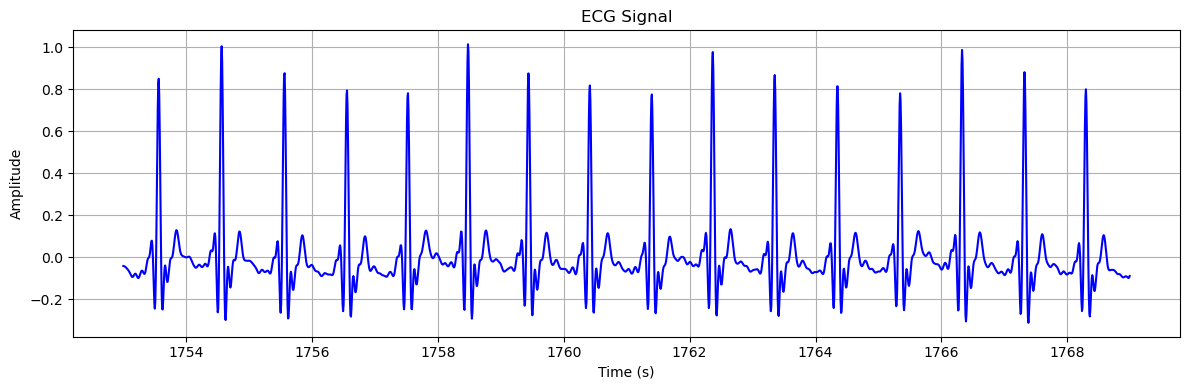

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ECG segment file
ecg_file = r"C:\Users\Admin\Desktop\lab\sleep_apnea\output_segments\ucddb002_Segments\HYP_C\ucddb002_HYP_C_1753_to_1769s.csv"
 # Replace with your actual file path
ecg_data = pd.read_csv(ecg_file)

# Clean column names just in case
ecg_data.columns = ecg_data.columns.str.strip()

# Extract time and signal
time = ecg_data['Time (s)']
signal = ecg_data['Preprocessed_ECG']

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, signal, color='blue')
plt.title('ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import os
import pandas as pd

# Root directory containing per-patient folders with subfolders for each event type
root_dir = r"C:\Users\Admin\Desktop\lab\sleep_apnea\output_segments"
output_dir = r"C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged"
os.makedirs(output_dir, exist_ok=True)

# Expected event types
event_types = ['APNEA_C', 'APNEA_M', 'APNEA_O', 'HYP_C', 'HYP_M', 'HYP_O', 'NON_APNEA']

# Initialize a dictionary to collect DataFrames per event type
merged_data = {etype: [] for etype in event_types}

# Traverse all patient folders in root_dir
for patient_folder in os.listdir(root_dir):
    patient_path = os.path.join(root_dir, patient_folder)
    if not os.path.isdir(patient_path):
        continue

    # For each expected event type
    for etype in event_types:
        type_folder = os.path.join(patient_path, etype)
        if not os.path.isdir(type_folder):
            continue

        # Read all CSV files in this type folder
        for filename in os.listdir(type_folder):
            if filename.endswith(".csv"):
                file_path = os.path.join(type_folder, filename)
                try:
                    df = pd.read_csv(file_path)
                    df['Source_File'] = filename  # Optional: add origin tag
                    merged_data[etype].append(df)
                except Exception as e:
                    print(f"⚠️ Failed to read {file_path}: {e}")

# Save merged CSVs
for etype, dfs in merged_data.items():
    if dfs:  # Only save if there's data
        merged_df = pd.concat(dfs, ignore_index=True)
        output_file = os.path.join(output_dir, f"{etype}_merged.csv")
        merged_df.to_csv(output_file, index=False)
        print(f"✅ Saved: {output_file}")


✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\APNEA_C_merged.csv
✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\APNEA_M_merged.csv
✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\APNEA_O_merged.csv
✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\HYP_C_merged.csv
✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\HYP_M_merged.csv
✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\HYP_O_merged.csv
✅ Saved: C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged\NON_APNEA_merged.csv


In [18]:
import os
import pandas as pd

# Folder paths
merged_folder = r"C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged"
cleaned_folder = r"C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged_cleaned"
os.makedirs(cleaned_folder, exist_ok=True)

# Minimum segment duration in seconds
MIN_DURATION = 3.0

# Process each merged CSV
for filename in os.listdir(merged_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(merged_folder, filename)
        try:
            df = pd.read_csv(file_path)

            # Drop rows with missing time values
            df = df.dropna(subset=["Time (s)"]).sort_values("Time (s)").reset_index(drop=True)

            # Identify segments by time gaps > 1 sec
            df['gap'] = df['Time (s)'].diff().fillna(0)
            df['segment_id'] = (df['gap'] > 1).cumsum()

            # Filter segments based on duration
            cleaned_segments = []
            for segment_id, segment in df.groupby('segment_id'):
                duration = segment['Time (s)'].iloc[-1] - segment['Time (s)'].iloc[0]
                if duration >= MIN_DURATION:
                    cleaned_segments.append(segment)

            # Save if valid segments exist
            if cleaned_segments:
                cleaned_df = pd.concat(cleaned_segments, ignore_index=True).drop(columns=["gap", "segment_id"])
                cleaned_df.to_csv(os.path.join(cleaned_folder, filename), index=False)
                print(f"✅ Saved cleaned file: {filename}")
            else:
                print(f"⚠️ No segments ≥ {MIN_DURATION} seconds in {filename}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")


✅ Saved cleaned file: APNEA_C_merged.csv
✅ Saved cleaned file: APNEA_M_merged.csv
✅ Saved cleaned file: APNEA_O_merged.csv
✅ Saved cleaned file: HYP_C_merged.csv
✅ Saved cleaned file: HYP_M_merged.csv
✅ Saved cleaned file: HYP_O_merged.csv
✅ Saved cleaned file: NON_APNEA_merged.csv


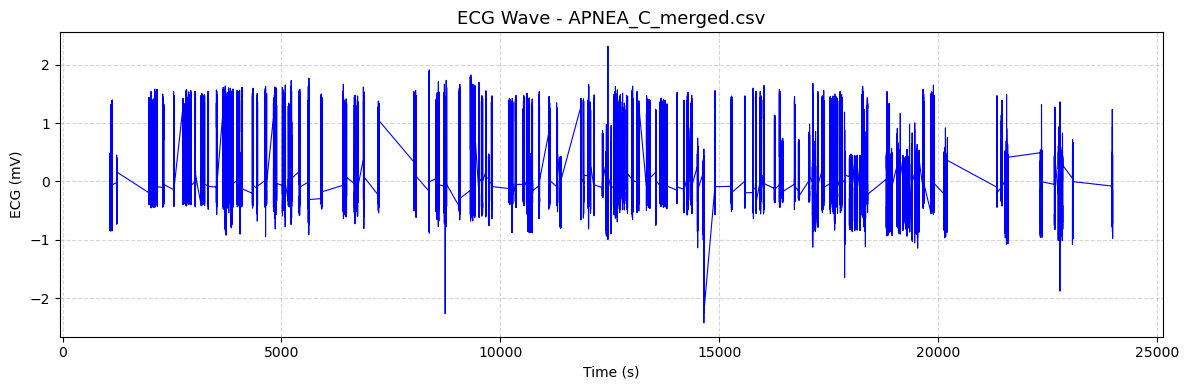

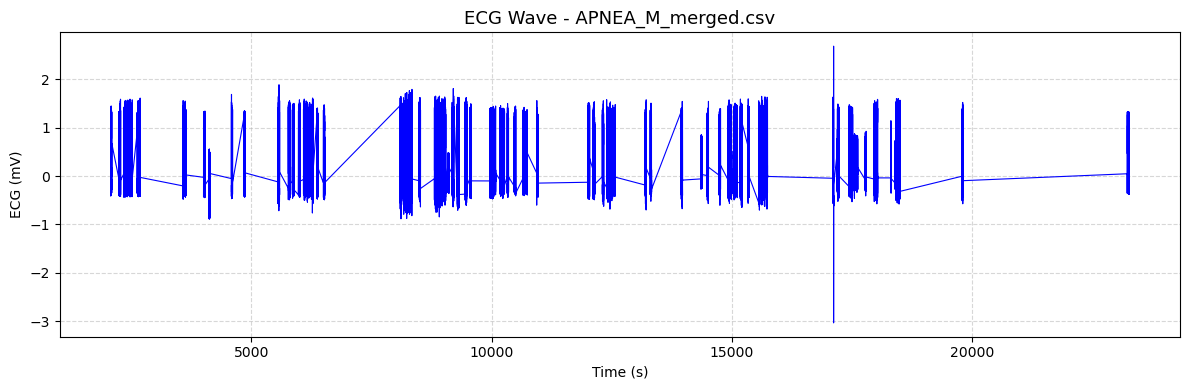

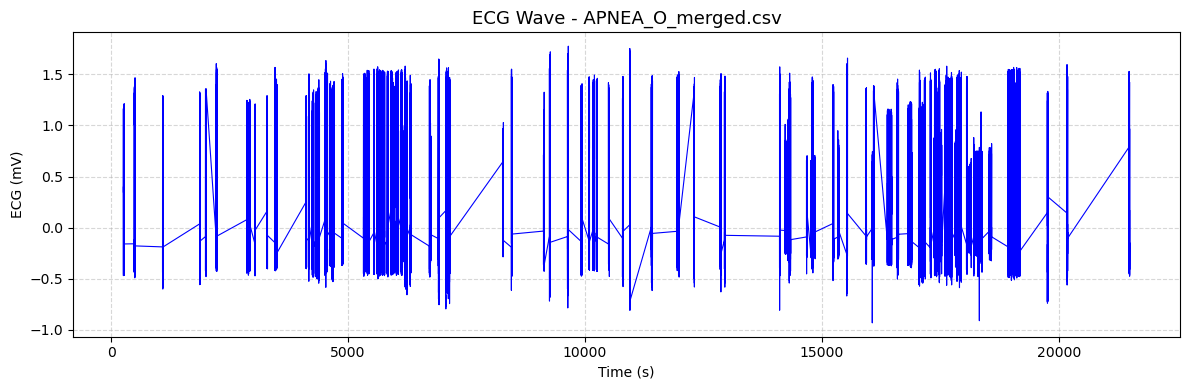

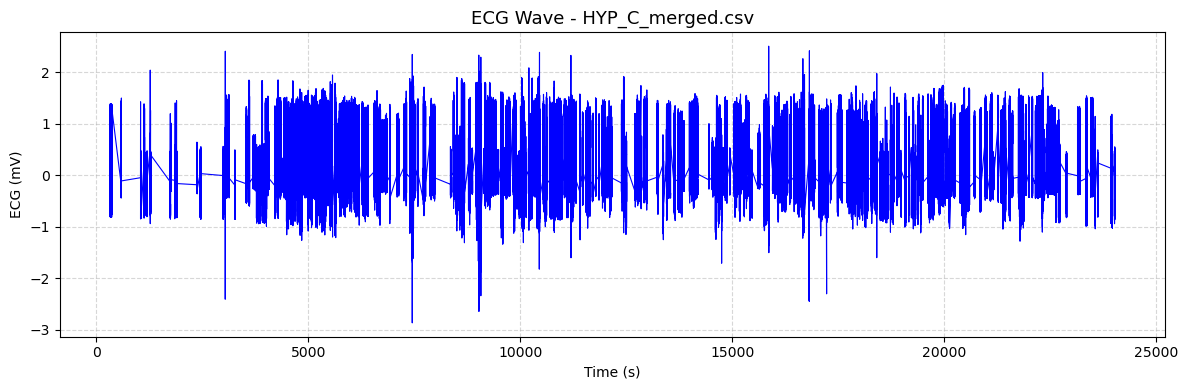

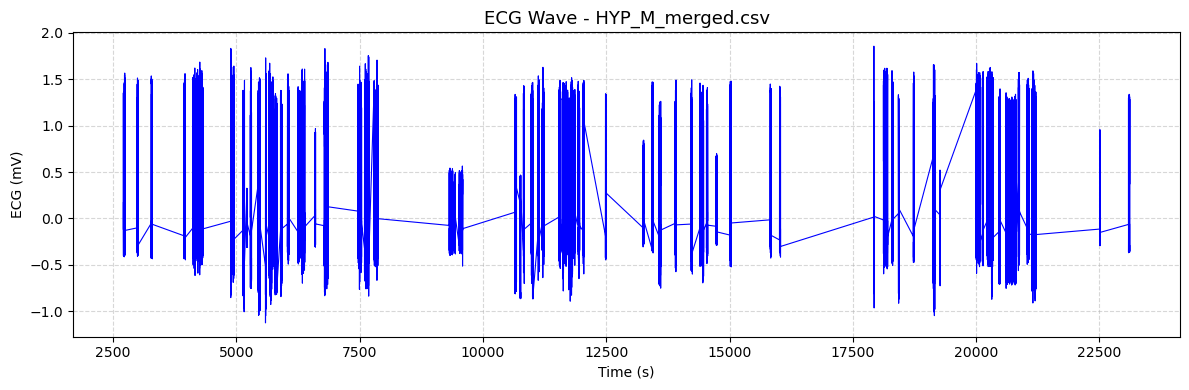

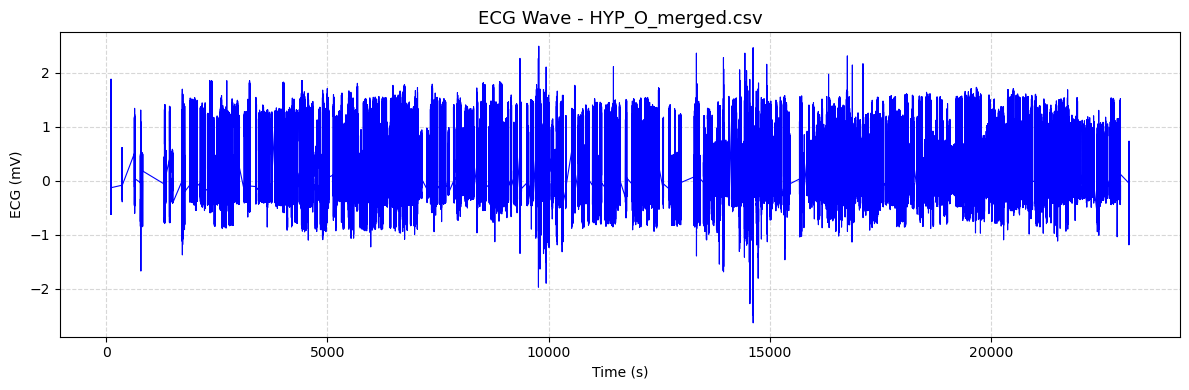

KeyboardInterrupt: 

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the folder with cleaned merged ECG files
folder_path = r"C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged_cleaned"

# Plot ECG waves for each CSV file
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)

            # Skip if required columns are missing
            if 'Time (s)' not in df.columns or 'Preprocessed_ECG' not in df.columns:
                print(f"Skipping {filename} - Missing required columns.")
                continue

            # Plot
            plt.figure(figsize=(12, 4))
            plt.plot(df['Time (s)'], df['Preprocessed_ECG'], color='blue', linewidth=0.8)
            plt.title(f"ECG Wave - {filename}", fontsize=13)
            plt.xlabel("Time (s)")
            plt.ylabel("ECG (mV)")
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error plotting {filename}: {e}")


In [25]:
import os
import pandas as pd

# Input and output paths
input_folder = r"C:\Users\Admin\Desktop\lab\sleep_apnea\final_merged_cleaned"
output_root = r"C:\Users\Admin\Desktop\lab\sleep_apnea\segmented_60s_final"
segment_length = 60  # in seconds

# Define valid event types
event_types = ['APNEA_C', 'APNEA_M', 'APNEA_O', 'HYP_C', 'HYP_M', 'HYP_O', 'NON_APNEA']

# Sort types by descending length to prevent substring misclassification
sorted_event_types = sorted(event_types, key=len, reverse=True)

# Create output subfolders for each event type
output_folders = {}
for etype in event_types:
    folder = os.path.join(output_root, etype)
    os.makedirs(folder, exist_ok=True)
    output_folders[etype] = folder

# Segment each file
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)

        # Match the correct event type using sorted list
        matched_type = None
        for etype in sorted_event_types:
            if etype.upper() in filename.upper():
                matched_type = etype
                break

        if not matched_type:
            print(f"⚠️ Skipping {filename}: Unknown event type.")
            continue

        try:
            # Load and clean the CSV
            df = pd.read_csv(file_path)
            df = df.dropna(subset=["Time (s)"]).sort_values("Time (s)").reset_index(drop=True)

            # Define segmentation window
            start_time = df["Time (s)"].min()
            end_time = df["Time (s)"].max()
            base_name = filename.replace(".csv", "")

            current_start = start_time
            while current_start + segment_length <= end_time:
                current_end = current_start + segment_length
                segment = df[(df["Time (s)"] >= current_start) & (df["Time (s)"] < current_end)]

                if not segment.empty:
                    segment_name = f"{base_name}_{int(current_start)}s_to_{int(current_end)}s.csv"
                    segment_path = os.path.join(output_folders[matched_type], segment_name)
                    segment.to_csv(segment_path, index=False)

                current_start = current_end

            print(f"✅ Segmented and stored: {filename} → {matched_type}")

        except Exception as e:
            print(f"❌ Error segmenting {filename}: {e}")


✅ Segmented and stored: APNEA_C_merged.csv → APNEA_C
✅ Segmented and stored: APNEA_M_merged.csv → APNEA_M
✅ Segmented and stored: APNEA_O_merged.csv → APNEA_O
✅ Segmented and stored: HYP_C_merged.csv → HYP_C
✅ Segmented and stored: HYP_M_merged.csv → HYP_M
✅ Segmented and stored: HYP_O_merged.csv → HYP_O
✅ Segmented and stored: NON_APNEA_merged.csv → NON_APNEA


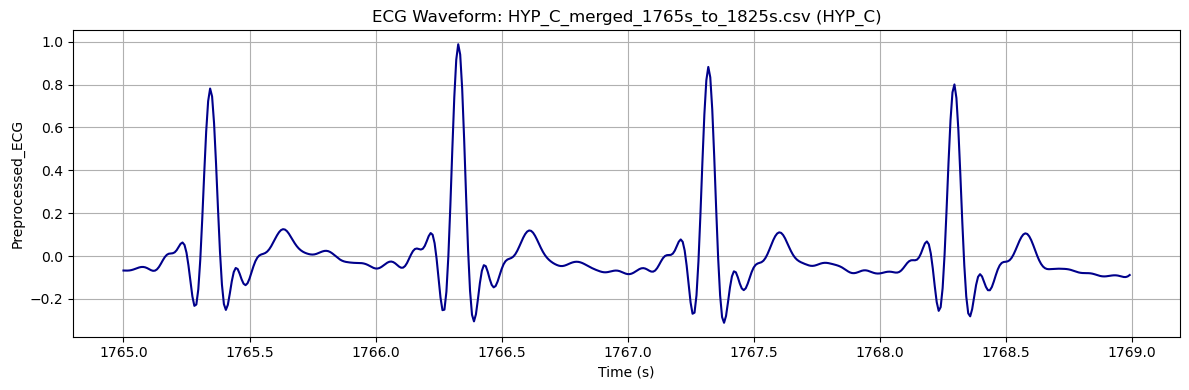

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Root segmented folder where 7 subfolders exist
segmented_root = r"C:\Users\Admin\Desktop\lab\sleep_apnea\segmented_60s_final"

def plot_ecg_wave(filename):
    # Search through each type folder
    for folder_name in os.listdir(segmented_root):
        folder_path = os.path.join(segmented_root, folder_name)
        if not os.path.isdir(folder_path):
            continue

        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                df = df.dropna(subset=["Time (s)", "Preprocessed_ECG"])

                # Plot
                plt.figure(figsize=(12, 4))
                plt.plot(df["Time (s)"], df["Preprocessed_ECG"], color="darkblue")
                plt.title(f"ECG Waveform: {filename} ({folder_name})")
                plt.xlabel("Time (s)")
                plt.ylabel("Preprocessed_ECG")
                plt.grid(True)
                plt.tight_layout()
                plt.show()
                return
            except Exception as e:
                print(f"❌ Error reading or plotting file: {e}")
                return

    print(f"❌ File '{filename}' not found in any type folder.")

# 🔍 Example usage:
# Just change the filename below to plot another ECG segment
filename = "HYP_C_merged_1765s_to_1825s.csv"
plot_ecg_wave(filename)


In [30]:
import shutil

# Full path to your folder
folder_path = r"C:\Users\Admin\Desktop\lab\sleep_apnea\segmented_60s_final"

# Create zip archive (will be saved in the same directory)
shutil.make_archive(folder_path, 'zip', folder_path)

print("Folder zipped successfully!")


Folder zipped successfully!
